[[  0   0   0]
 [128   0   0]
 [  0 128   0]
 [128 128   0]
 [  0   0 128]
 [128   0 128]
 [  0 128 128]
 [128 128 128]
 [ 64   0   0]
 [192   0   0]
 [ 64 128   0]
 [192 128   0]
 [ 64   0 128]
 [192   0 128]
 [ 64 128 128]
 [192 128 128]
 [  0  64   0]
 [128  64   0]
 [  0 192   0]
 [128 192   0]
 [  0  64 128]
 [128  64 128]
 [  0 192 128]
 [128 192 128]
 [ 64  64   0]
 [192  64   0]
 [ 64 192   0]
 [192 192   0]
 [ 64  64 128]
 [192  64 128]
 [ 64 192 128]
 [192 192 128]
 [  0   0  64]
 [128   0  64]
 [  0 128  64]
 [128 128  64]
 [  0   0 192]
 [128   0 192]
 [  0 128 192]
 [128 128 192]
 [ 64   0  64]
 [192   0  64]
 [ 64 128  64]
 [192 128  64]
 [ 64   0 192]
 [192   0 192]
 [ 64 128 192]
 [192 128 192]
 [  0  64  64]
 [128  64  64]
 [  0 192  64]
 [128 192  64]
 [  0  64 192]
 [128  64 192]
 [  0 192 192]
 [128 192 192]
 [ 64  64  64]
 [192  64  64]
 [ 64 192  64]
 [192 192  64]
 [ 64  64 192]
 [192  64 192]
 [ 64 192 192]
 [192 192 192]
 [ 32   0   0]
 [160   0   0]
 [ 32 128 

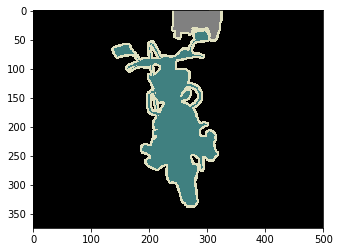

In [42]:
file_name = "/home/lrh/dataset/VOCdevkit/VOC2007/SegmentationClass/009938.png"

import cv2
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=1e6)
from PIL import Image
img = Image.open(file_name)
indexed = np.array(img)
palette = img.getpalette()
num_colours = len(palette)/3
max_val = float(np.iinfo(indexed.dtype).max)
#print max_val
map = np.array(palette).reshape(num_colours, 3)

print map
img = img.convert("RGB",palette=map)

#print map
#print map
#.convert("P")
#img = cv2.imread(file_name)
#img = img.resize([32,32])
img = np.array(img)
print img.shape
plt.imshow(img)
print img.shape
#print img
#print img
plt.show()
#print img1

In [16]:
import numpy as np


a = np.ones([4,4])
b = np.ones([2,2])

print [a,b]

[array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]]), array([[ 1.,  1.],
       [ 1.,  1.]])]


In [11]:
import os
import os.path as osp
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import collections
from torch.utils import data


class VOCDataSet(data.Dataset):
    def __init__(self, root, split="train", img_transform=None, label_transform=None):
        self.root = root
        self.split = split
        self.img_transform = img_transform
        self.label_transform = label_transform
        self.files = []

        data_dir = osp.join(root, "VOC2007")
        imgsets_dir = osp.join(data_dir, "ImageSets/Segmentation/%s.txt" % split)
        with open(imgsets_dir) as imgset_file:
            for name in imgset_file:
                name = name.strip()
                img_file = osp.join(data_dir, "JPEGImages/%s.jpg" % name)
                label_file = osp.join(data_dir, "SegmentationClass/%s.png" % name)
                self.files.append({
                    "img": img_file,
                    "label": label_file
                })

    def __len__(self):
        return len(self.files)

    def __getitem__(self, index):
        datafiles = self.files[index]

        img_file = datafiles["img"]
        img = Image.open(img_file).convert('RGB')

        label_file = datafiles["label"]
        label = Image.open(label_file).convert("P")

        if self.img_transform is not None:
            img = self.img_transform(img)

        if self.label_transform is not None:
            label = self.label_transform(label)

        return img, label



root_dir = "/home/lrh/dataset/VOCdevkit";
loader = data.DataLoader(VOCDataSet(root_dir),
                         batch_size=12, shuffle=True, pin_memory=True)

for data in loader:
    image,label = data

TypeError: batch must contain tensors, numbers, dicts or lists; found <class 'PIL.Image.Image'>

In [ ]:
a = torch.